In [95]:
cd /content/drive/MyDrive/deep1

/content/drive/MyDrive/MachineLearning/deep1


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# from google.colab.patches import cv2_imshow

## mnist dataset

In [97]:
#load dataset
dataset = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(X_test.min(), X_test.max(), X_test.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)
print(Y_test.min(), Y_test.max(), Y_test.dtype)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0 255 uint8
0 255 uint8
0 9 uint8
0 9 uint8


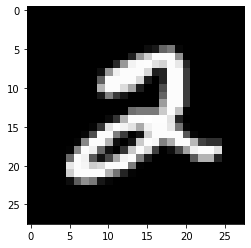

In [98]:
plt.imshow(X_train[5], cmap = 'gray')

In [99]:
#normalize and convert labels to_categorical
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.min(), X_train.max(), X_train.dtype)

classes = np.unique(Y_train)
Y_train = to_categorical(Y_train, num_classes=len(classes))
Y_test = to_categorical(Y_test, num_classes=len(classes))
print(Y_train.shape, Y_test.shape)
print(Y_train[0])

0.0 1.0 float32
(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### deep model(cnn) on mnist dataset


In [100]:
input_shape = (28, 28, 1)

model = tf.keras.models.Sequential([
         Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
         MaxPool2D((2, 2)),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [101]:
X_train1 = X_train[..., tf.newaxis]
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_train1, Y_train, test_size=0.2)

model.fit(X_train1, Y_train1, validation_data=(X_val1, Y_val1), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1751 - accuracy: 0.9476 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 2/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0611 - val_accuracy: 0.9827
Epoch 3/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0395 - accuracy: 0.9876 - val_loss: 0.0468 - val_accuracy: 0.9850
Epoch 4/5
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.0497 - val_accuracy: 0.9862
Epoch 5/5
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.0536 - val_accuracy: 0.9841


In [102]:
# evaluate
X_test1 = X_test[..., tf.newaxis]
acc = model.evaluate(X_test1, Y_test)

print("deep model accuracy ", acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0576 - accuracy: 0.9829
deep model accuracy  [0.05764823034405708, 0.9829000234603882]


### mlp on mnist dataset

In [103]:
X_train = np.reshape(X_train, (-1, X_train.shape[1]* X_train.shape[2]))
X_test = np.reshape(X_test, (-1, X_test.shape[1] * X_test.shape[2]))
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [104]:
input_dim = X_train.shape[1]

model = tf.keras.models.Sequential([
         Dense(64, input_dim = input_dim, activation='relu'),
         Dense(32, activation = 'relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

In [105]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.9047 - val_loss: 0.1754 - val_accuracy: 0.9472
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1440 - accuracy: 0.9569 - val_loss: 0.1330 - val_accuracy: 0.9592
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9679 - val_loss: 0.1178 - val_accuracy: 0.9646
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0828 - accuracy: 0.9747 - val_loss: 0.1089 - val_accuracy: 0.9675
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9784 - val_loss: 0.1109 - val_accuracy: 0.9663


In [106]:
# eavaluate
acc = mlp_model.evaluate(X_test, Y_test)
print("mlp accuracy", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9706
mlp accuracy [0.10180678218603134, 0.9706000089645386]


# fasion_mnist dataset

In [107]:
dataset = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(X_test.min(), X_test.max(), X_test.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)
print(Y_test.min(), Y_test.max(), Y_test.dtype)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
0 255 uint8
0 255 uint8
0 9 uint8
0 9 uint8


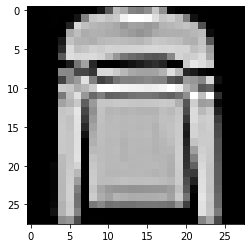

In [108]:
plt.imshow(X_train[5], cmap = 'gray')

In [109]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.min(), X_train.max(), X_train.dtype)

classes = np.unique(Y_train)
Y_train = to_categorical(Y_train, num_classes=len(classes))
Y_test = to_categorical(Y_test, num_classes=len(classes))
print(Y_train.shape, Y_test.shape)
print(Y_train[0])

0.0 1.0 float32
(60000, 10) (10000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### deep model(cnn) on fasion_mnist dataset

In [110]:
input_shape = (28, 28, 1)

model = tf.keras.models.Sequential([
         Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'),
         MaxPool2D((2, 2)),
         Flatten(),
         Dense(100, activation='relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________


In [111]:
X_train1 = X_train[..., tf.newaxis]
X_test1 = X_test[..., tf.newaxis]

X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X_train1, Y_train, test_size=0.2)

model.fit(X_train1, Y_train1, validation_data=(X_val1, Y_val1), epochs=5)

Epoch 1/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.3980 - accuracy: 0.8579 - val_loss: 0.3001 - val_accuracy: 0.8926
Epoch 2/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2686 - accuracy: 0.9017 - val_loss: 0.2646 - val_accuracy: 0.9046
Epoch 3/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2224 - accuracy: 0.9183 - val_loss: 0.2519 - val_accuracy: 0.9115
Epoch 4/5
1500/1500 [==============================] - 47s 32ms/step - loss: 0.1873 - accuracy: 0.9309 - val_loss: 0.2498 - val_accuracy: 0.9124
Epoch 5/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1580 - accuracy: 0.9419 - val_loss: 0.2801 - val_accuracy: 0.9043


In [112]:
# evaluate
acc = model.evaluate(X_test1, Y_test)

print("deep model accuracy ", acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.2972 - accuracy: 0.8976
deep model accuracy  [0.29716673493385315, 0.897599995136261]


### MLP on on fasion_mnist dataset

In [120]:
X_train = np.reshape(X_train, (-1, X_train.shape[1]* X_train.shape[2]))
X_test = np.reshape(X_test, (-1, X_test.shape[1] * X_test.shape[2]))
print(X_train.shape, X_test.shape)


(150000, 1024) (30000, 1024)


In [121]:
input_dim = X_train.shape[1]

model = tf.keras.models.Sequential([
         Dense(64, input_dim = input_dim, activation='relu'),
         Dense(32, activation = 'relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

In [115]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5519 - accuracy: 0.8102 - val_loss: 0.4435 - val_accuracy: 0.8373
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4026 - accuracy: 0.8555 - val_loss: 0.3725 - val_accuracy: 0.8610
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3624 - accuracy: 0.8690 - val_loss: 0.3762 - val_accuracy: 0.8602
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8759 - val_loss: 0.3504 - val_accuracy: 0.8685
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3170 - accuracy: 0.8833 - val_loss: 0.3486 - val_accuracy: 0.8683
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8880 - val_loss: 0.3499 - val_accuracy: 0.8699
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8923 - val_loss: 0.3507 - val_accuracy:

In [116]:
model.evaluate(X_test, Y_test)
print("mlp accuracy ", acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3788 - accuracy: 0.8663
mlp accuracy  [0.29716673493385315, 0.897599995136261]


## cifar10 dataset

In [3]:
dataset = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(X_test.min(), X_test.max(), X_test.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)
print(Y_test.min(), Y_test.max(), Y_test.dtype)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
0 255 uint8
0 255 uint8
0 9 uint8
0 9 uint8


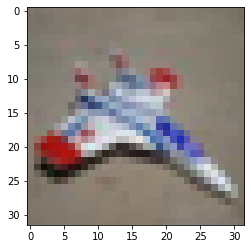

In [4]:
plt.imshow(X_train[30], cmap = 'gray')

In [5]:

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(X_train.min(), X_train.max(), X_train.dtype)

classes = np.unique(Y_train)
# Y_train = to_categorical(Y_train, num_classes=len(classes))
# Y_test = to_categorical(Y_test, num_classes=len(classes))
# print(Y_train.shape, Y_test.shape)
# print(Y_train[0])

0.0 1.0 float32


### deep

In [18]:
input_shape = (32, 32, 3)

model = tf.keras.models.Sequential([
         Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(128, (3, 3), activation='relu'),
         Flatten(),
        #  Dense(128, activation='relu'),
         Dense(64, activation='relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [19]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=20)

Epoch 1/10
656/656 [==============================] - 5s 7ms/step - loss: 1.7611 - accuracy: 0.3496 - val_loss: 1.5247 - val_accuracy: 0.4535
Epoch 2/10
656/656 [==============================] - 4s 7ms/step - loss: 1.3830 - accuracy: 0.5040 - val_loss: 1.4011 - val_accuracy: 0.4965
Epoch 3/10
656/656 [==============================] - 5s 7ms/step - loss: 1.2249 - accuracy: 0.5646 - val_loss: 1.2259 - val_accuracy: 0.5630
Epoch 4/10
656/656 [==============================] - 4s 7ms/step - loss: 1.1042 - accuracy: 0.6066 - val_loss: 1.2452 - val_accuracy: 0.5648
Epoch 5/10
656/656 [==============================] - 4s 7ms/step - loss: 1.0009 - accuracy: 0.6481 - val_loss: 1.0944 - val_accuracy: 0.6182
Epoch 6/10
656/656 [==============================] - 4s 7ms/step - loss: 0.9121 - accuracy: 0.6822 - val_loss: 1.0954 - val_accuracy: 0.6155
Epoch 7/10
656/656 [==============================] - 4s 7ms/step - loss: 0.8136 - accuracy: 0.7189 - val_loss: 1.0306 - val_accuracy: 0.6317
Epoch 

In [20]:
model.evaluate(X_test, Y_test)


313/313 [==============================] - 1s 4ms/step - loss: 1.1522 - accuracy: 0.6359


[1.1522371768951416, 0.6359000205993652]

### mlp

In [21]:
X_train = np.reshape(X_train, (-1, X_train.shape[1]* X_train.shape[2]* X_train.shape[3]))
X_test = np.reshape(X_test, (-1, X_test.shape[1] * X_test.shape[2]* X_test.shape[3]))

print(X_train.shape, X_test.shape)

(13107, 3072) (10000, 3072)


In [22]:
input_dim = X_train.shape[1]

model = tf.keras.models.Sequential([
         Dense(64, input_dim = input_dim, activation='relu'),
         Dense(32, activation = 'relu'),
         Dense(16, activation = 'relu'),
         Dense(10, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)


Epoch 1/10
328/328 [==============================] - 2s 5ms/step - loss: 2.1530 - accuracy: 0.2054 - val_loss: 2.0226 - val_accuracy: 0.2769
Epoch 2/10
328/328 [==============================] - 1s 4ms/step - loss: 1.9659 - accuracy: 0.2799 - val_loss: 1.9327 - val_accuracy: 0.2792
Epoch 3/10
328/328 [==============================] - 1s 4ms/step - loss: 1.8880 - accuracy: 0.3157 - val_loss: 1.8585 - val_accuracy: 0.3196
Epoch 4/10
328/328 [==============================] - 1s 4ms/step - loss: 1.8384 - accuracy: 0.3327 - val_loss: 1.8222 - val_accuracy: 0.3448
Epoch 5/10
328/328 [==============================] - 1s 4ms/step - loss: 1.7935 - accuracy: 0.3531 - val_loss: 1.8018 - val_accuracy: 0.3516
Epoch 6/10
328/328 [==============================] - 1s 4ms/step - loss: 1.7802 - accuracy: 0.3542 - val_loss: 1.7928 - val_accuracy: 0.3455
Epoch 7/10
328/328 [==============================] - 1s 5ms/step - loss: 1.7550 - accuracy: 0.3660 - val_loss: 1.7444 - val_accuracy: 0.3627
Epoch 

In [24]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7294 - accuracy: 0.3759


[1.7294138669967651, 0.375900000333786]

## cifar100 dataset


In [25]:
dataset = tf.keras.datasets.cifar100
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.min(), X_train.max(), X_train.dtype)
print(X_test.min(), X_test.max(), X_test.dtype)
print(Y_train.min(), Y_train.max(), Y_train.dtype)
print(Y_test.min(), Y_test.max(), Y_test.dtype)

169017344/169001437 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
0 255 uint8
0 255 uint8
0 99 int64
0 99 int64


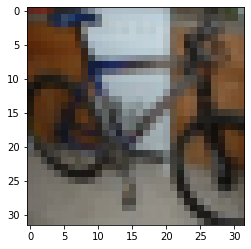

In [26]:
plt.imshow(X_train[30], cmap = 'gray')

In [27]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.min(), X_train.max(), X_train.dtype)

classes = np.unique(Y_train)
Y_train = to_categorical(Y_train, num_classes=len(classes))
Y_test = to_categorical(Y_test, num_classes=len(classes))
print(Y_train.shape, Y_test.shape)
print(Y_train[0])

0.0 1.0 float32
(50000, 100) (10000, 100)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### deep

In [30]:
input_shape = (32, 32, 3)

model = tf.keras.models.Sequential([
         Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Flatten(),
         Dense(128, activation='relu'),
         Dense(64, activation='relu'),
         Dense(100, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)

Epoch 1/10
1000/1000 [==============================] - 10s 10ms/step - loss: 4.1958 - accuracy: 0.0500 - val_loss: 3.9801 - val_accuracy: 0.0800
Epoch 2/10
1000/1000 [==============================] - 9s 9ms/step - loss: 3.6995 - accuracy: 0.1271 - val_loss: 3.5821 - val_accuracy: 0.1475
Epoch 3/10
1000/1000 [==============================] - 9s 9ms/step - loss: 3.4039 - accuracy: 0.1776 - val_loss: 3.3487 - val_accuracy: 0.1901
Epoch 4/10
1000/1000 [==============================] - 9s 9ms/step - loss: 3.1823 - accuracy: 0.2159 - val_loss: 3.1632 - val_accuracy: 0.2233
Epoch 5/10
1000/1000 [==============================] - 8s 8ms/step - loss: 3.0104 - accuracy: 0.2491 - val_loss: 3.0403 - val_accuracy: 0.2508
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 2.8716 - accuracy: 0.2777 - val_loss: 3.0173 - val_accuracy: 0.2561
Epoch 7/10
1000/1000 [==============================] - 9s 9ms/step - loss: 2.7538 - accuracy: 0.2992 - val_loss: 2.9164 - val_accurac

In [32]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.9377 - accuracy: 0.2865


[2.93769907951355, 0.2865000069141388]

### mlp

In [33]:
X_train = np.reshape(X_train, (-1, X_train.shape[1]* X_train.shape[2]* X_train.shape[3]))
X_test = np.reshape(X_test, (-1, X_test.shape[1] * X_test.shape[2]* X_test.shape[3]))
print(X_train.shape, X_test.shape)


(32000, 3072) (10000, 3072)


In [34]:
input_dim = X_train.shape[1]

model = tf.keras.models.Sequential([
         Dense(64, input_dim = input_dim, activation='relu'),
         Dense(32, activation = 'relu'),
         Dense(32, activation = 'relu'),
         Dense(100, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics='accuracy')

In [35]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10)

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 4.3504 - accuracy: 0.0395 - val_loss: 4.0958 - val_accuracy: 0.0614
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 4.0442 - accuracy: 0.0728 - val_loss: 3.9816 - val_accuracy: 0.0722
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 3.9302 - accuracy: 0.0900 - val_loss: 3.9175 - val_accuracy: 0.0909
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 3.8545 - accuracy: 0.1023 - val_loss: 3.8326 - val_accuracy: 0.1003
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 3.7869 - accuracy: 0.1152 - val_loss: 3.8547 - val_accuracy: 0.1058
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 3.7310 - accuracy: 0.1263 - val_loss: 3.7817 - val_accuracy: 0.1172
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 3.6832 - accuracy: 0.1344 - val_loss: 3.6957 - val_accuracy: 0.1270
Epoch 

In [36]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 3.6983 - accuracy: 0.1398


[3.6982789039611816, 0.13979999721050262]